<a href="https://colab.research.google.com/github/debolina201/Pie-AI-Session2/blob/main/Handwritten_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading and preparing the data

In [ ]:
from keras.datasets import mnist
from matplotlib import pyplot

# load dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


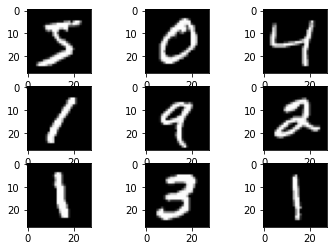

In [ ]:
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))

for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(X_train[i], cmap=pyplot.get_cmap('gray'))

# show the figure
pyplot.show()

In [ ]:
# image dimensions
image_size = X_train.shape[1]
input_size = image_size * image_size
input_size

784

In [ ]:
# reshape dataset to have a single channel
X_train = X_train.reshape((X_train.shape[0], input_size))
X_test = X_test.reshape((X_test.shape[0], input_size))

In [ ]:
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [ ]:
# one hot encode target values

from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
y_train.shape, y_test.shape

((60000, 10), (10000, 10))

In [ ]:
# convert from integers to floats
train_norm = X_train.astype('float32')
test_norm = X_test.astype('float32')

# normalize to range 0-1
train_norm = train_norm / 255.0
test_norm = test_norm / 255.0

In [ ]:
train_norm.shape, test_norm.shape

((60000, 784), (10000, 784))

# Model

In [ ]:
# network parameters
batch_size = 128
hidden_units = 256

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

model = Sequential()

model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(0.4))

model.add(Dense(10))
model.add(Activation('softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2

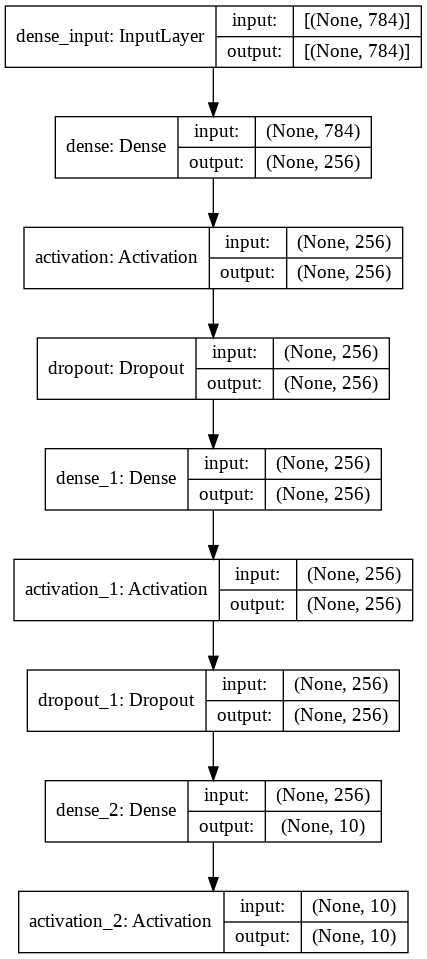

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

In [ ]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.fit(train_norm, y_train, epochs=20, batch_size=batch_size)

Epoch 1/20
469/469 [==============================] - 4s 8ms/step - loss: 0.7338 - accuracy: 0.7686
Epoch 2/20
469/469 [==============================] - 4s 7ms/step - loss: 0.2172 - accuracy: 0.9345
Epoch 3/20
469/469 [==============================] - 4s 8ms/step - loss: 0.1681 - accuracy: 0.9488
Epoch 4/20
469/469 [==============================] - 3s 7ms/step - loss: 0.1365 - accuracy: 0.9598
Epoch 5/20
469/469 [==============================] - 3s 7ms/step - loss: 0.1215 - accuracy: 0.9621
Epoch 6/20
469/469 [==============================] - 3s 7ms/step - loss: 0.1079 - accuracy: 0.9659
Epoch 7/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0987 - accuracy: 0.9690
Epoch 8/20
469/469 [==============================] - 6s 13ms/step - loss: 0.0952 - accuracy: 0.9703
Epoch 9/20
469/469 [==============================] - 4s 7ms/step - loss: 0.0884 - accuracy: 0.9724
Epoch 10/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0850 - accuracy: 0.973

In [ ]:
loss, acc = model.evaluate(test_norm, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

79/79 [==============================] - 0s 3ms/step - loss: 0.0628 - accuracy: 0.9818

Test accuracy: 98.2%


In [ ]:
preds = model.predict_classes(test_norm)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
preds[0:5]

array([7, 2, 1, 0, 4])

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import numpy as np

print(confusion_matrix(np.argmax(y_test, axis=1), preds))
print(accuracy_score(np.argmax(y_test, axis=1), preds))

print("---------- Classification Report -------------")
print(classification_report(np.argmax(y_test, axis=1), preds))

[[ 974    0    1    0    0    1    1    1    2    0]
 [   0 1129    1    0    0    1    2    0    2    0]
 [   4    1 1010    2    3    0    2    7    3    0]
 [   0    0    4  991    0    4    0    6    1    4]
 [   0    0    2    0  964    0    5    1    0   10]
 [   2    0    0    5    1  874    3    1    3    3]
 [   5    3    0    1    3    2  941    0    3    0]
 [   3    4    7    0    0    0    0 1008    1    5]
 [   7    1    3    3    3    4    1    6  943    3]
 [   2    2    0    2    9    0    0    9    1  984]]
0.9818
---------- Classification Report -------------
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.99      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.98   